In [69]:
#Definir FUNCIÓN que me permitirá importar un archivo CSV y cargarlo en un DataFrame de pandas
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd  #Python llama a paquetería pandas 
    return pd.read_csv(file)

In [70]:
#Utilizar el nombre de la FUNCIÓN PREdefinida y la ruta de acceso (path) al archivo .csv de interés
import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,PLZ07F,10/2/2021,Palizada,Coast,PLZ07,Bottom,Dry,8.37,36889.2,2.829,...,7.92,22.81,36170.8,56.65,26.040,18.58745,-91.83044,2715,2851,2851.0
102,PLZ08S,10/2/2021,Palizada,Coast,PLZ08,Surface,Dry,2.73,37133.6,0.363,...,8.39,22.57,35851.5,5.90,26.872,18.64028,-91.86907,2638,2837,2837.0
103,PLZ08F,10/2/2021,Palizada,Coast,PLZ08,Bottom,Dry,9.27,39340.8,5.185,...,7.89,24.53,38622.9,173.00,25.973,18.63984,-91.86890,2608,2857,2857.0
104,PLZ09S,10/2/2021,Palizada,Coast,PLZ09,Surface,Dry,3.71,37034.5,0.384,...,8.62,22.57,35851.9,9.18,26.727,18.66676,-91.90047,2605,2804,2804.0


In [71]:
#Definir una VARIABLE para poder manipular el DataFrame (no solo visualizarlo)
terminos_df = import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

# 10 Kruskal-Wallis H-test for independent samples

In [72]:
%pip install scikit-posthocs

import scikit_posthocs as sp



Note: you may need to restart the kernel to use updated packages.


In [73]:
#Crear una FUNCIÓN para realizar la prueba de Kruskal-Wallis
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
        #Crear una f-string (permite insertar variables dentro del texto usando {}). Aquí, esto permite acceder a los ATRIBUTOS statistic y pvalue del OBJETO result
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    #Crear una CONDICIONAL para interpretar el resultado. pvalue < 0.05 es estadisticamente significativo
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")

In [74]:
def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

In [75]:
terminos_df.describe()

,chlorophy_microg_l,cond_microsiemens_cm,depth_m,do_percent_sat,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,99.000000
mean,6.545472,27895.183962,1.830160,89.515094,6.474340,17.331981,27126.980189,100.429623,26.758755,18.615912,-91.602783,2797.981132,2912.915094,2902.888889
std,14.941262,20931.232513,2.038739,29.772291,2.104254,13.578980,20527.530804,290.290113,0.917242,0.112832,0.240359,499.852416,472.694346,473.698989
min,0.360000,13.800000,0.105000,1.700000,0.120000,0.000000,13.700000,0.880000,24.470000,18.424030,-91.902180,2152.000000,2357.000000,2357.000000
25%,2.555000,1778.025000,0.428750,84.575000,5.632500,0.857500,1706.875000,5.950000,26.062000,18.535825,-91.809810,2452.250000,2585.500000,2561.500000
50%,3.705000,33202.600000,0.638500,97.100000,6.940000,19.760000,31803.250000,19.090000,26.806000,18.610050,-91.786895,2646.500000,2823.000000,2814.000000
75%,5.925000,47046.650000,2.883250,105.300000,7.722500,30.297500,46668.975000,54.762500,27.153250,18.698798,-91.367565,2963.250000,3053.750000,3029.000000
max,150.900000,59988.600000,8.558000,174.100000,11.660000,38.780000,58105.000000,2422.930000,29.283000,18.821780,-91.244000,4324.000000,4307.000000,4307.000000


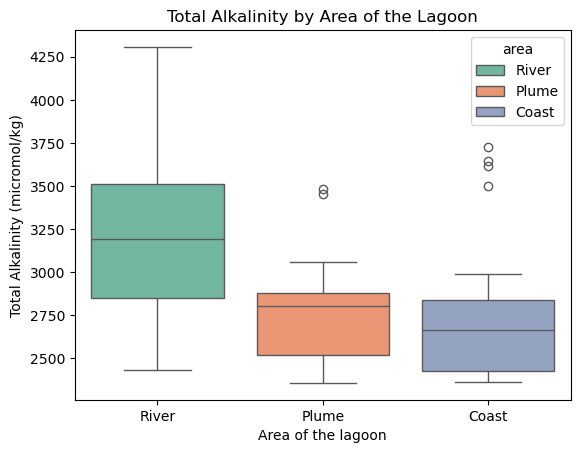

In [76]:

# Plot ta values for each area of the lagoon using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='ta_micromol_kg', data=terminos_df, palette="Set2", hue= "area", legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
plt.xlabel('Area of the lagoon')
plt.ylabel('Total Alkalinity (micromol/kg)')
plt.title('Total Alkalinity by Area of the Lagoon')
plt.show()

In [77]:
# Select the data for each area of the lagoon
ta_river = terminos_df[terminos_df['area'] == 'River']['ta_micromol_kg']
ta_plume = terminos_df[terminos_df['area'] == 'Plume']['ta_micromol_kg']
ta_coast= terminos_df[terminos_df['area'] == 'Coast']['ta_micromol_kg']

In [78]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(ta_river, ta_plume, ta_coast)

H statistic = 23.340675555846637
p-value = 8.543517259038796e-06
The difference between groups is statistically significant.


In [79]:
dunn_posthoc(terminos_df, 'area', 'ta_micromol_kg')


          Coast     Plume     River
Coast  1.000000  1.000000  0.000016
Plume  1.000000  1.000000  0.000659
River  0.000016  0.000659  1.000000


,Coast,Plume,River
Coast,1.000000,1.000000,0.000016
Plume,1.000000,1.000000,0.000659
River,0.000016,0.000659,1.000000


# 10. Exercise: Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data.

#### 10.1 Perform Kruskal-Wallis test and a box plot for DIC data for each area.

In [80]:
terminos_df.columns  #Visualizar los nombres de las columnas del DataFrame

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

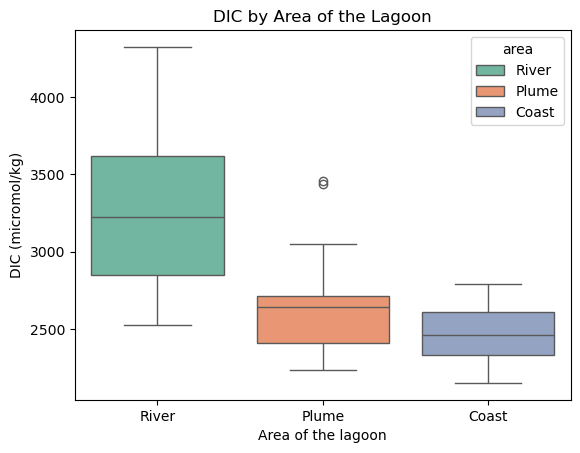

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='dic_micromol_kg', data=terminos_df, palette="Set2", hue= "area", legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
plt.xlabel('Area of the lagoon')
plt.ylabel('DIC (micromol/kg)')
plt.title('DIC by Area of the Lagoon')
plt.show()

In [82]:

# Select the data for each area of the lagoon
dic_river = terminos_df[terminos_df['area'] == 'River']['dic_micromol_kg']
dic_plume = terminos_df[terminos_df['area'] == 'Plume']['dic_micromol_kg']
dic_coast= terminos_df[terminos_df['area'] == 'Coast']['dic_micromol_kg']

In [83]:

# Perform the Kruskal-Wallis test
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


In [84]:
#Ejecutar la prueba post hoc de Dunn. Es una forma de saber entre qué grupos hay diferencias significativas, después de haber detectado que existen diferencias generales con la prueba de Kruskal-Wallis. 
dunn_posthoc(terminos_df, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


#### 10.2 Perform Kruskal-Wallis test and a box plot for Tempearature data for each area.

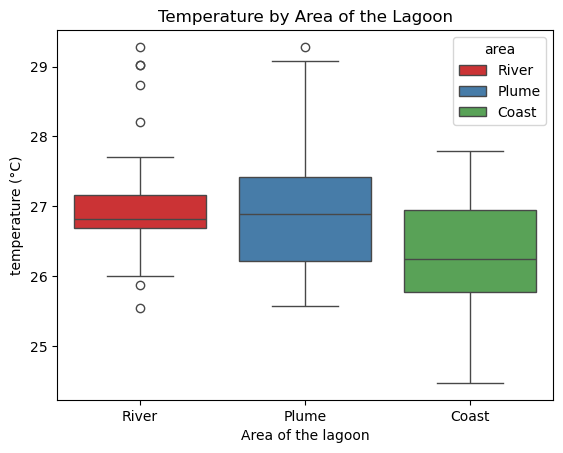

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='temp_c', data=terminos_df, palette="Set1", hue= "area", legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
plt.xlabel('Area of the lagoon')
plt.ylabel('temperature (°C)')
plt.title('Temperature by Area of the Lagoon')
plt.show()

In [86]:

# Select the data for each area of the lagoon
temp_river = terminos_df[terminos_df['area'] == 'River']['temp_c']
temp_plume = terminos_df[terminos_df['area'] == 'Plume']['temp_c']
temp_coast= terminos_df[terminos_df['area'] == 'Coast']['temp_c']

In [87]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


In [88]:
#Ejecutar la prueba post hoc de Dunn. Es una forma de saber entre qué grupos hay diferencias significativas, después de haber detectado que existen diferencias generales con la prueba de Kruskal-Wallis. 
dunn_posthoc(terminos_df, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00
